# Experiment 3: Regression

## Importations

In [17]:
import torch
import numpy as np
import pylab as pl
from numpy.random import choice

## Loading the data

In [18]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

## Data Preprocessing

In [19]:
mean = X_train.mean(axis=0)
X_train -= mean
X_test -= mean
std = X_train.std(axis=0)
X_train /= std
X_test /= std

X_train = torch.from_numpy(X_train).reshape(X_train.shape[0], 1, X_train.shape[1]).to(torch.float32)
X_test = torch.from_numpy(X_test).reshape(X_test.shape[0], 1, X_test.shape[1]).to(torch.float32)
y_train = torch.from_numpy(y_train).reshape(y_train.shape[0],).to(torch.float32)
y_test = torch.from_numpy(y_test).reshape(y_test.shape[0],).to(torch.float32)

## Model & Optimization algorithms

In [20]:
batches_per_epoch = 1
batch_size= 400
mse_loss = torch.nn.MSELoss()
mae_loss = torch.nn.L1Loss()
Nepochs = 70

In [21]:
from ModelRegression import Net

### Stochastic Gradient Descent

In [22]:
model_ConvNN = Net()
mse_train_sgd, mse_test_sgd, mae_train_sgd, mae_test_sgd = model_ConvNN.training_SGD(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=5e-3, verbose=True)

Launching SGD training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 584.0310668945312| MAE train = 22.362844467163086 | Loss test = 584.475341796875| MAE test = 22.392593383789062
Epoch 11 / 70 : Loss train = 44.38530349731445| MAE train = 5.100964546203613 | Loss test = 57.21512985229492| MAE test = 6.026506423950195
Epoch 21 / 70 : Loss train = 45.96859359741211| MAE train = 5.022099018096924 | Loss test = 60.21854782104492| MAE test = 6.193457126617432
Epoch 31 / 70 : Loss train = 34.381099700927734| MAE train = 4.504566192626953 | Loss test = 52.32415008544922| MAE test = 5.449850082397461
Epoch 41 / 70 : Loss train = 26.918811798095703| MAE train = 3.9108474254608154 | Loss test = 36.12071228027344| MAE test = 4.493894577026367
Epoch 51 / 70 : Loss train = 27.14373779296875| MAE train = 3.8614296913146973 | Loss test = 44.13743591308594| MAE test = 5.018013000488281
Epoch 61 / 70 : Loss train = 27.54471206665039| MAE train = 3.8874611854553223 | Loss test = 46.

### Momentum

In [23]:
model_ConvNN = Net()
mse_train_mom, mse_test_mom, mae_train_mom, mae_test_mom = model_ConvNN.training_Mom(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=1e-2, beta=0.9, verbose=True)

Launching Momentum training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 589.195556640625| MAE train = 22.437326431274414 | Loss test = 610.2735595703125| MAE test = 22.934953689575195
Epoch 11 / 70 : Loss train = 90.64410400390625| MAE train = 7.117441177368164 | Loss test = 114.9504623413086| MAE test = 8.19272232055664
Epoch 21 / 70 : Loss train = 48.395164489746094| MAE train = 5.099693298339844 | Loss test = 36.086002349853516| MAE test = 4.710834980010986
Epoch 31 / 70 : Loss train = 29.353073120117188| MAE train = 3.9564101696014404 | Loss test = 47.34882354736328| MAE test = 5.164757251739502
Epoch 41 / 70 : Loss train = 27.055513381958008| MAE train = 3.620098829269409 | Loss test = 40.93498229980469| MAE test = 4.397409915924072
Epoch 51 / 70 : Loss train = 18.061918258666992| MAE train = 3.1426002979278564 | Loss test = 31.01436424255371| MAE test = 3.7848360538482666
Epoch 61 / 70 : Loss train = 18.73483657836914| MAE train = 3.120318651199341 | Loss tes

### Nesterov Accelerated Gradient 

In [24]:
model_ConvNN = Net()
mse_train_nag, mse_test_nag, mae_train_nag, mae_test_nag = model_ConvNN.training_NAG(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=1e-2, beta=0.9, verbose=True)

Launching NAG training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 589.6602783203125| MAE train = 22.452268600463867 | Loss test = 612.0603637695312| MAE test = 22.993070602416992
Epoch 11 / 70 : Loss train = 119.4540023803711| MAE train = 8.414813995361328 | Loss test = 68.85039520263672| MAE test = 6.383017063140869
Epoch 21 / 70 : Loss train = 26.881847381591797| MAE train = 3.822554588317871 | Loss test = 36.411006927490234| MAE test = 4.602687835693359
Epoch 31 / 70 : Loss train = 26.220050811767578| MAE train = 3.745692253112793 | Loss test = 34.8311882019043| MAE test = 4.304780960083008
Epoch 41 / 70 : Loss train = 22.726293563842773| MAE train = 3.4887795448303223 | Loss test = 27.0543270111084| MAE test = 3.9143011569976807
Epoch 51 / 70 : Loss train = 22.078414916992188| MAE train = 3.4402284622192383 | Loss test = 36.19719696044922| MAE test = 4.529802322387695
Epoch 61 / 70 : Loss train = 16.949810028076172| MAE train = 3.074725389480591 | Loss test = 

### AdaGrad

In [25]:
model_ConvNN = Net()
mse_train_adg, mse_test_adg, mae_train_adg, mae_test_adg = model_ConvNN.training_ADG(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, epsilon=1e-8, verbose=True)

Launching AdaGrad training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 594.499755859375| MAE train = 22.567184448242188 | Loss test = 600.1572265625| MAE test = 22.744911193847656
Epoch 11 / 70 : Loss train = 87.80779266357422| MAE train = 7.170043468475342 | Loss test = 81.87718200683594| MAE test = 7.255645751953125
Epoch 21 / 70 : Loss train = 38.236549377441406| MAE train = 4.530643463134766 | Loss test = 43.68505859375| MAE test = 5.354121208190918
Epoch 31 / 70 : Loss train = 28.99517059326172| MAE train = 3.9707794189453125 | Loss test = 40.318328857421875| MAE test = 4.721922397613525
Epoch 41 / 70 : Loss train = 26.226896286010742| MAE train = 3.879519462585449 | Loss test = 27.17001724243164| MAE test = 4.221834182739258
Epoch 51 / 70 : Loss train = 25.305767059326172| MAE train = 3.7215051651000977 | Loss test = 39.249813079833984| MAE test = 4.537513256072998
Epoch 61 / 70 : Loss train = 25.846229553222656| MAE train = 3.8030223846435547 | Loss test = 2

### RMSProp

In [26]:
model_ConvNN = Net()
mse_train_rms, mse_test_rms, mae_train_rms, mae_test_rms = model_ConvNN.training_RMS(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.005, gamma=0.999, epsilon=1e-8, verbose=True)

Launching RMS Prop training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 592.6032104492188| MAE train = 22.53661346435547 | Loss test = 595.4678955078125| MAE test = 22.639726638793945


Epoch 11 / 70 : Loss train = 55.84449768066406| MAE train = 5.519199848175049 | Loss test = 57.13309097290039| MAE test = 5.776364326477051
Epoch 21 / 70 : Loss train = 33.93561935424805| MAE train = 4.266481876373291 | Loss test = 50.44983673095703| MAE test = 4.782180309295654
Epoch 31 / 70 : Loss train = 29.08536148071289| MAE train = 4.034759998321533 | Loss test = 40.650997161865234| MAE test = 4.753643989562988
Epoch 41 / 70 : Loss train = 27.723304748535156| MAE train = 3.709908962249756 | Loss test = 34.83521270751953| MAE test = 4.353435039520264
Epoch 51 / 70 : Loss train = 21.702835083007812| MAE train = 3.401365280151367 | Loss test = 32.546112060546875| MAE test = 3.9463915824890137
Epoch 61 / 70 : Loss train = 22.20639419555664| MAE train = 3.5620522499084473 | Loss test = 50.26139450073242| MAE test = 4.380113124847412


### AdaDelta

In [27]:
model_ConvNN = Net()
mse_train_add, mse_test_add, mae_train_add, mae_test_add = model_ConvNN.training_ADD(X_train, y_train, X_test, y_test, n_epochs=Nepochs, rho=0.99, epsilon=1e-5, verbose=True)

Launching AdaDelta training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 582.2489624023438| MAE train = 22.33590316772461 | Loss test = 610.244873046875| MAE test = 22.981128692626953
Epoch 11 / 70 : Loss train = 574.3357543945312| MAE train = 22.1708927154541 | Loss test = 607.6136474609375| MAE test = 22.923057556152344
Epoch 21 / 70 : Loss train = 574.0807495117188| MAE train = 22.142715454101562 | Loss test = 602.5038452148438| MAE test = 22.81705093383789
Epoch 31 / 70 : Loss train = 568.3446044921875| MAE train = 22.031076431274414 | Loss test = 597.0028686523438| MAE test = 22.704099655151367
Epoch 41 / 70 : Loss train = 556.1034545898438| MAE train = 21.75821304321289 | Loss test = 580.598388671875| MAE test = 22.350025177001953
Epoch 51 / 70 : Loss train = 493.7284240722656| MAE train = 20.361482620239258 | Loss test = 504.0328674316406| MAE test = 20.679149627685547
Epoch 61 / 70 : Loss train = 224.6308135986328| MAE train = 12.943436622619629 | Loss test 

### Adam

In [28]:
model_ConvNN = Net()
mse_train_adam, mse_test_adam, mae_train_adam, mae_test_adam = model_ConvNN.training_ADAM(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)

Launching Adam training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 584.2197875976562| MAE train = 22.388076782226562 | Loss test = 574.6235961914062| MAE test = 22.164091110229492
Epoch 11 / 70 : Loss train = 119.95584106445312| MAE train = 8.094629287719727 | Loss test = 76.10281372070312| MAE test = 6.672700881958008


Epoch 21 / 70 : Loss train = 48.961517333984375| MAE train = 5.346603870391846 | Loss test = 50.251522064208984| MAE test = 5.840731143951416
Epoch 31 / 70 : Loss train = 38.383296966552734| MAE train = 4.5189032554626465 | Loss test = 48.94147872924805| MAE test = 4.999755382537842
Epoch 41 / 70 : Loss train = 25.235275268554688| MAE train = 3.8239548206329346 | Loss test = 45.41899871826172| MAE test = 4.963978290557861
Epoch 51 / 70 : Loss train = 26.496511459350586| MAE train = 3.9847545623779297 | Loss test = 38.001136779785156| MAE test = 4.420249938964844
Epoch 61 / 70 : Loss train = 22.816944122314453| MAE train = 3.5877904891967773 | Loss test = 40.75518035888672| MAE test = 4.14163064956665


### AMS Grad

In [29]:
model_ConvNN = Net()
mse_train_ams, mse_test_ams, mae_train_ams, mae_test_ams = model_ConvNN.training_AMS(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.005, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)

Launching AMS Grad training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 580.6375122070312| MAE train = 22.295421600341797 | Loss test = 587.87158203125| MAE test = 22.487104415893555


Epoch 11 / 70 : Loss train = 46.714927673339844| MAE train = 5.230157852172852 | Loss test = 68.82829284667969| MAE test = 6.803903579711914
Epoch 21 / 70 : Loss train = 42.960716247558594| MAE train = 4.824029445648193 | Loss test = 36.60068893432617| MAE test = 4.505837440490723
Epoch 31 / 70 : Loss train = 35.8864631652832| MAE train = 4.6731858253479 | Loss test = 44.27471160888672| MAE test = 5.366198539733887
Epoch 41 / 70 : Loss train = 30.296367645263672| MAE train = 4.043419361114502 | Loss test = 37.27962875366211| MAE test = 4.277485370635986
Epoch 51 / 70 : Loss train = 21.61307144165039| MAE train = 3.460399866104126 | Loss test = 31.928438186645508| MAE test = 4.133632659912109
Epoch 61 / 70 : Loss train = 20.04497718811035| MAE train = 3.4356558322906494 | Loss test = 34.69303894042969| MAE test = 4.552121639251709


### Nadam

In [30]:
model_ConvNN = Net()
mse_train_nadam, mse_test_nadam, mae_train_nadam, mae_test_nadam = model_ConvNN.training_NADAM(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, mu=0.9, nu=0.999, epsilon=1e-8, verbose=True)

Launching Nadam training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 586.2359619140625| MAE train = 22.37527847290039 | Loss test = 514.912353515625| MAE test = 20.66196060180664
Epoch 11 / 70 : Loss train = 33.04838943481445| MAE train = 4.220980167388916 | Loss test = 40.51648712158203| MAE test = 4.825030326843262
Epoch 21 / 70 : Loss train = 26.843463897705078| MAE train = 3.823291301727295 | Loss test = 34.843807220458984| MAE test = 4.577927112579346
Epoch 31 / 70 : Loss train = 20.723180770874023| MAE train = 3.4378044605255127 | Loss test = 38.157073974609375| MAE test = 4.482791900634766
Epoch 41 / 70 : Loss train = 20.299571990966797| MAE train = 3.414577007293701 | Loss test = 36.7596321105957| MAE test = 4.162092685699463
Epoch 51 / 70 : Loss train = 18.102602005004883| MAE train = 3.1985580921173096 | Loss test = 39.95418930053711| MAE test = 4.363588809967041
Epoch 61 / 70 : Loss train = 20.686613082885742| MAE train = 3.3062591552734375 | Loss test =

### Adamax

In [31]:
model_ConvNN = Net()
mse_train_adamax, mse_test_adamax, mae_train_adamax, mae_test_adamax = model_ConvNN.training_ADAMAX(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, beta1=0.9, beta2=0.999, lambd=0, epsilon=1e-8, verbose=True)

Launching Adamax training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 590.9359741210938| MAE train = 22.490257263183594 | Loss test = 570.67236328125| MAE test = 22.05596351623535
Epoch 11 / 70 : Loss train = 168.87396240234375| MAE train = 9.709338188171387 | Loss test = 161.28285217285156| MAE test = 9.84225082397461
Epoch 21 / 70 : Loss train = 55.475887298583984| MAE train = 5.652297496795654 | Loss test = 53.08866500854492| MAE test = 5.678536415100098
Epoch 31 / 70 : Loss train = 34.393043518066406| MAE train = 4.44497013092041 | Loss test = 36.217864990234375| MAE test = 4.767735004425049
Epoch 41 / 70 : Loss train = 31.560569763183594| MAE train = 4.274781703948975 | Loss test = 28.9409236907959| MAE test = 4.298943042755127
Epoch 51 / 70 : Loss train = 26.967693328857422| MAE train = 3.8312859535217285 | Loss test = 37.636863708496094| MAE test = 4.687755584716797
Epoch 61 / 70 : Loss train = 26.69089126586914| MAE train = 3.7577097415924072 | Loss test = 

## Plots

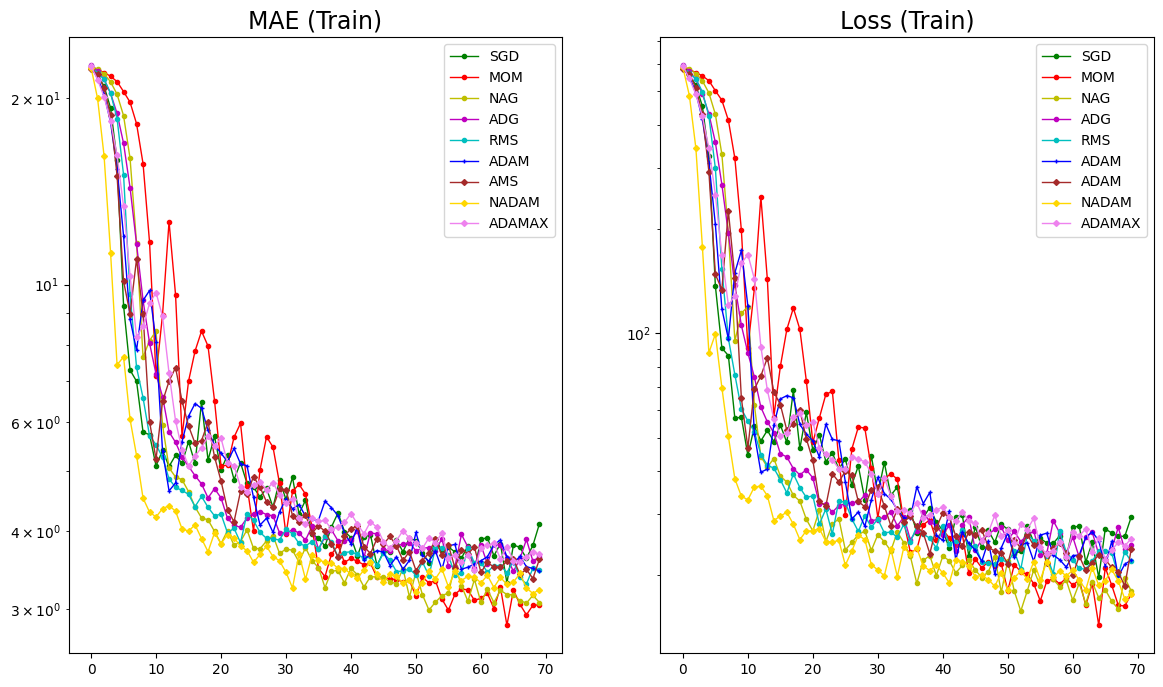

In [32]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

#ax[0].plot(A_gd, 'bo-', markersize=3, linewidth=1, label='GD')
ax[0].plot(mae_train_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(mae_train_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(mae_train_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(mae_train_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(mae_train_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(mae_train_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(mae_train_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(mae_train_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(mae_train_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("MAE (Train)", size=17)
ax[0].legend()
ax[0].set_yscale('log')

#ax[1].plot([v.detach().numpy() for v in L_gd], 'bo-', markersize=3, linewidth=1, label='GD')
ax[1].plot(mse_train_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(mse_train_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(mse_train_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(mse_train_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(mse_train_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(mse_train_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(mse_train_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(mse_train_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(mse_train_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
# ax[1].set_ylim(0,1)
ax[1].legend()
ax[1].set_yscale('log')